### Predicting heart disease using machine learning

This notebook looks into using various python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether someone has heart disease or not based on their medical attributes.

### 1. Problem definition :
in a statement, 
>given the clinical parameters about a patient, can we predict whether or not they have a heart disease?

### 2. Data
>the original dataset can be found on kaggle

### 3. Evaluation
> if we can achieve a minimum of 80% accuracy in predicting whether someone has heart disease during the proof of concept, we'll pursue the project.

### 4. Features:
>this is where you will get information about each feature in your data.
1. Age: displays the age of the individual.
2. Sex: displays the gender of the individual using the following format :
   1 = male
   0 = female
3. Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
   1 = typical angina
   2 = atypical angina
   3 = non — anginal pain
   4 = asymptotic
4. Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)
5. Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
6. Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
   If fasting blood sugar > 120mg/dl then : 1 (true)
   else : 0 (false)
7. Resting ECG : displays resting electrocardiographic results
   0 = normal
   1 = having ST-T wave abnormality
   2 = left ventricular hyperthrophy
8. Max heart rate achieved : displays the max heart rate achieved by an individual.
9.  Exercise induced angina :
    1 = yes
    0 = no
10. ST depression induced by exercise relative to rest: displays the value which is an integer or float.
11. Peak exercise ST segment :
    1 = upsloping
    2 = flat
    3 = downsloping
12. Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
13. Thal : displays the thalassemia :
    3 = normal
    6 = fixed defect
    7 = reversible defect
14. Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not :
    0 = absence
    1, 2, 3, 4 = present.

### Preparing our tools

In [1]:
#regular EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#models from sci-kit learn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

### Load data 

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape #(rows,columns)

(303, 14)

### Data exploration (EDA)

the goal here is to know more about the data and become a subject matter expert on the dataset you are working with.

1. What question's are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. what's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, remove or change features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.target.value_counts() #1 = have heart disease, 0= does not have heart disease

1    165
0    138
Name: target, dtype: int64

In [6]:
len(df)

303

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

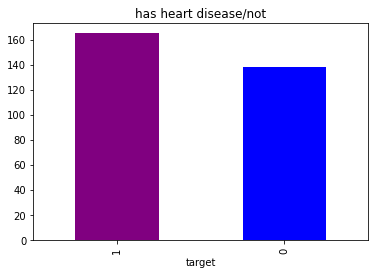

In [9]:
#let's visualize the target variable
df["target"].value_counts().plot(kind = "bar", color = ["purple","blue"], xlabel = "target", title = "has heart disease/not");

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Comparing the different feature attributes to the target attribute:
 Let's compare the sex attribute to the target (heart disease frequency according to the sex of the patient)

In [11]:
df.sex.value_counts() # 1 = male, 0 = female

1    207
0     96
Name: sex, dtype: int64

In [12]:
#compare the target column with the sex column
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


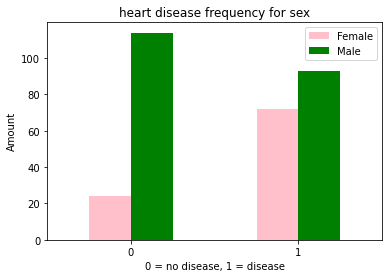

In [13]:
#creating a plot of the crosstab
pd.crosstab(df["target"], df["sex"]).plot(kind = "bar", color = ["pink", "green"], title ="heart disease frequency for sex")
plt.xlabel("0 = no disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0);

In [14]:
#let's compare the target column and fbs(fasting blood sugar) column
pd.crosstab(df["target"], df["fbs"])

fbs,0,1
target,,
0,116,22
1,142,23


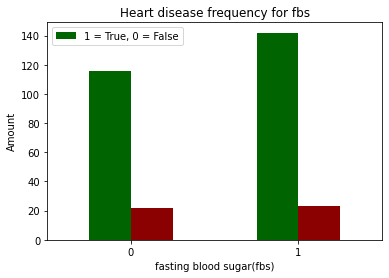

In [15]:
pd.crosstab(df["target"], df["fbs"]).plot(kind = "bar", color = ["darkgreen","darkred"])
plt.xlabel("fasting blood sugar(fbs)")
plt.ylabel("Amount")
plt.title("Heart disease frequency for fbs")
plt.legend(["1 = True, 0 = False"])
plt.xticks(rotation = 0);

### Age vs max heart rate(thalach) for heart disease

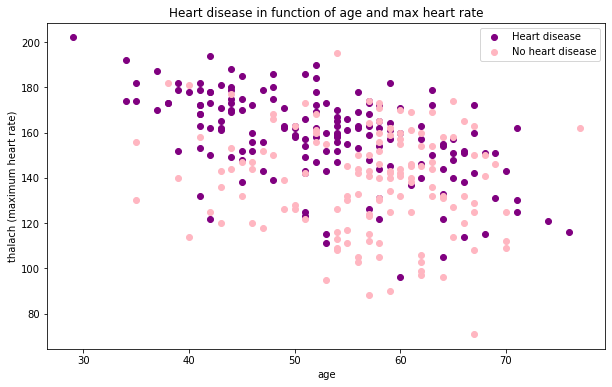

In [16]:
#create another figure
plt.figure(figsize = (10,6))

#scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="purple")

#scatter with the negative examples
plt.scatter(df.age[df.target!=1],
           df.thalach[df.target!=1],
           c="lightpink")

#adding some helpful info
plt.xlabel("age")
plt.ylabel("thalach (maximum heart rate)")
plt.legend(["Heart disease" ,"No heart disease"])
plt.title("Heart disease in function of age and max heart rate");

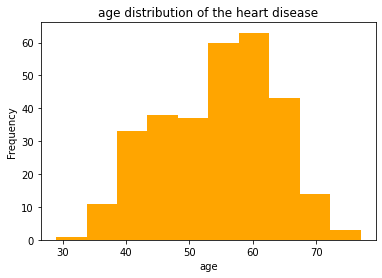

In [17]:
#check the distribution of the age column with a histogram
df["age"].plot(kind = "hist", color = "orange")
plt.title("age distribution of the heart disease")
plt.xlabel("age");

### Heart disease frequency per chest pain type

Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
* 1 = typical angina
* 2 = atypical angina
* 3 = non — anginal pain
* 4 = asymptotic

In [18]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


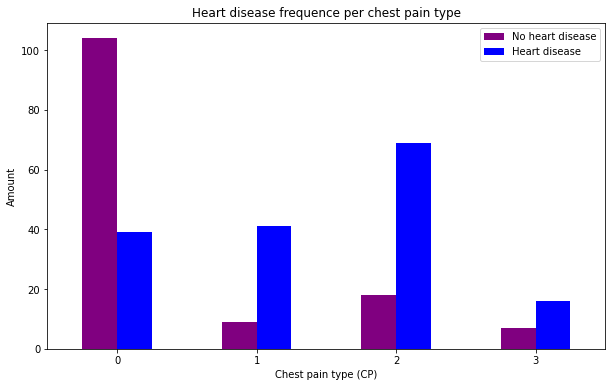

In [19]:
#make the crosstab more visual
pd.crosstab(df["cp"],df["target"]).plot(kind = "bar",figsize = (10,6), color =["purple","blue"])
plt.title("Heart disease frequence per chest pain type")
plt.legend(["No heart disease","Heart disease"])
plt.xticks(rotation = 0)
plt.xlabel("Chest pain type (CP)")
plt.ylabel("Amount");

### make a correlation matrix

In [20]:
df.corr(method="pearson")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


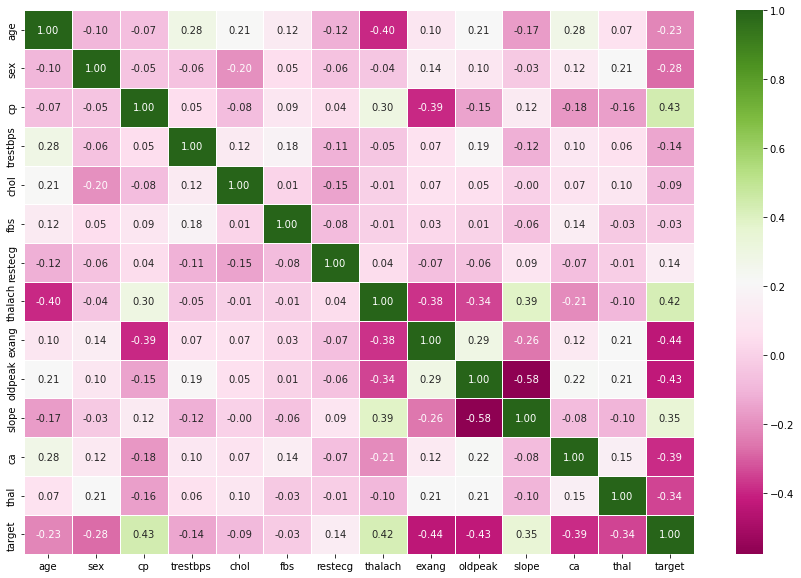

In [21]:
#let's make our correlation matrix more visual
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix, annot = True, linewidths=0.5,
                fmt= ".2f", cmap="PiYG")

### comparing restecg to our target variable
Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

In [22]:
pd.crosstab(df["restecg"], df["target"])

target,0,1
restecg,,
0,79,68
1,56,96
2,3,1


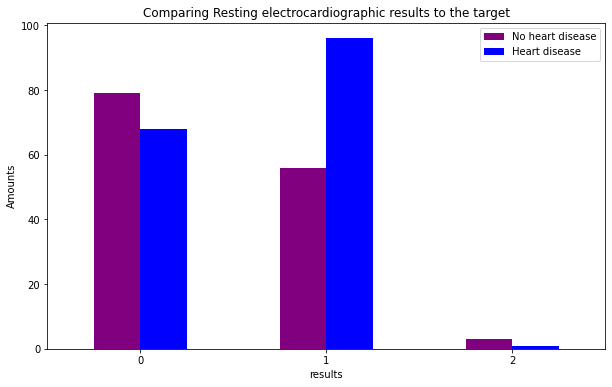

In [23]:
pd.crosstab(df["restecg"], df["target"]).plot(kind = "bar", figsize = (10,6), color = ["purple","blue"])

plt.title("Comparing Resting electrocardiographic results to the target")
plt.xlabel("results")
plt.ylabel("Amounts")
plt.legend(["No heart disease", "Heart disease"])
plt.xticks(rotation = 0);

### 5. Modelling

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
#split the data into x and y variables
x = df.drop("target", axis = 1)
y = df["target"]

#split into train and test splits
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### Let's try 3 different machine learning models for our classification problem:
1. Logistic regression
2. K- nearest neighbours classifier
3. Random forest classifier

In [26]:
#put all the models in a dictionary
models = {"Logistic regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random forest classifier": RandomForestClassifier()}

#create a function to fit and score the models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates the given machine learning models.
    models : a dict of different sklearn machine learning models
    x_train : Training data (no labels)
    x_test : testing data(no labels)
    y_train : training labels
    y_test : test labels
    """
    #setting the random seed
    np.random.seed(42)
    #make a dict to keep the model scores
    model_scores ={}
    #Loop through the models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(x_train, y_train)
        #evaluate the model and append its score to the model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores   

In [27]:
model_scores = fit_and_score(models, x_train, x_test, y_train, y_test)

model_scores

C:\Users\aryas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random forest classifier': 0.8360655737704918}

### Model comparison

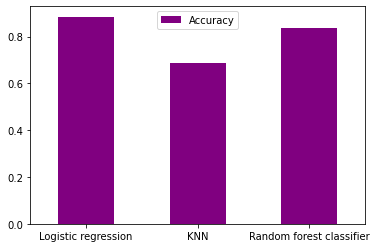

In [28]:
model_compare = pd.DataFrame(model_scores,index = ["Accuracy"] )
model_compare.T.plot(kind = "bar", color = "purple")
plt.xticks(rotation = 0);

### Let's look at the following :
* Hyperparamter tuning
* Feature importance 
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1-score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparamter tuning(by hand)

In [29]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [30]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [31]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

The maximum knn score on test data :75.41%


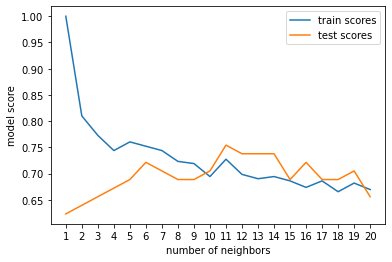

In [32]:
plt.plot(neighbors , train_scores, label = "train scores")
plt.plot(neighbors, test_scores, label = "test scores")
plt.xlabel("number of neighbors")
plt.ylabel("model score")
plt.legend()
plt.xticks(np.arange(1,21,1))

print(f"The maximum knn score on test data :{max(test_scores)*100:.2f}%")

### Hyperparameter tuning with randomized search CV
we will tune :
* LogisticRegression()
* RandomForestClassifier()

In [33]:
#Create a hyperparamter grid for logistic regression
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["lbfgs", "liblinear"],
               }

#create a hyperparameter grid for RandomForestClassifier
clf_grid = {"n_estimators":np.arange(10,1000,50),
            "max_depth":[None, 3,5,10],
            "min_samples_split":np.arange(2,20,2),
            "min_samples_leaf":np.arange(1,20,2),
           "max_features":["sqrt","log2"]}

In [34]:
#Tune the logistic regression

np.random.seed(42)

rs_log_grid = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,
                                cv = 5,verbose = True, n_iter = 20)

#fit the model
rs_log_grid.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\aryas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['lbfgs', 'liblinear']},
                   verbose=True)

In [35]:
rs_log_grid.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [36]:
rs_log_grid.score(x_test,y_test)

0.8852459016393442

In [37]:
#tune the RandomForestClassifier now
np.random.seed(42)

rs_clf_grid = RandomizedSearchCV(RandomForestClassifier(),param_distributions=clf_grid, cv = 5,
                                verbose = True, n_iter= 30)

#fit the clf
rs_clf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [38]:
#find the best hyperparameters
rs_clf_grid.best_params_

{'n_estimators': 210,
 'min_samples_split': 12,
 'min_samples_leaf': 13,
 'max_features': 'sqrt',
 'max_depth': None}

In [39]:
#evaluate it
rs_clf_grid.score(x_test,y_test)

0.8688524590163934

### Hyperparameter tuning with GridSearvhCV

In [40]:
#Let's tune the logistic regression
np.random.seed(42)

gs_log_reg = GridSearchCV(LogisticRegression(max_iter=10000), param_grid= log_reg_grid,
                         cv = 5, verbose = True)

#fit the model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['lbfgs', 'liblinear']},
             verbose=True)

In [41]:
#find the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [42]:
#evaluation
gs_log_reg.score(x_test, y_test)

0.8852459016393442

### Evaluating our tuned machine learning classifier, beyond just accuracy.

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Presicion
* Recall
* f1 score

... and it would be great if cross validation was used where possible.

> To make comparisons and evaluate our trained model, first we need to make predictions.

In [43]:
#Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

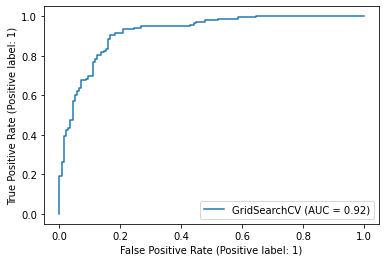

In [44]:
#Plot the ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, x, y);

In [45]:
roc_auc_score(y_test, y_preds)

0.8841594827586207

In [46]:
#Confusion matrix
conf_matrix = print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


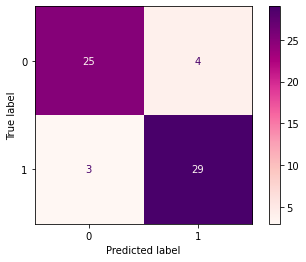

In [47]:
#import confusion matrix display
from sklearn.metrics import ConfusionMatrixDisplay
#visualise the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, cmap= "RdPu");

In [48]:
#clasification report 
class_report = classification_report(y_test, y_preds)
print(class_report)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

In [49]:
#check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [50]:
#create a new classifier with best parameters
clf = LogisticRegression(C =0.23357214690901212, solver="liblinear")

In [51]:
#cross-validated accuracy
accuracy = cross_val_score(clf,x, y, cv = 5, scoring="accuracy", verbose = True)
print(f"The accuracy score is: {np.mean(accuracy)*100:.2f}%")
cv_acc = np.mean(accuracy)

The accuracy score is: 84.80%


In [52]:
#cross-validated precision
prec_score = cross_val_score(clf, x, y, cv = 5, scoring="precision", verbose = True)
print(f"The precision score is: {np.mean(prec_score)*100:.2f}%")
cv_prec_score = np.mean(prec_score)

The precision score is: 82.16%


In [53]:
#cross-validated recall
recall_score = cross_val_score(clf, x, y, cv = 5, scoring="recall", verbose = True)
print(f" The recall score is: {np.mean(recall_score)}")
cv_recall = np.mean(recall_score)

 The recall score is: 0.9272727272727274


In [54]:
#cross-validated f1_score
f1 = cross_val_score(clf, x, y, cv = 5, scoring="f1", verbose = True)
print(f"The f1-score is: {np.mean(f1)}")
cv_f1 = np.mean(f1)

The f1-score is: 0.8705403543192143


In [55]:
#visualize the cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_prec_score,
                          "Recall":cv_recall,
                          "F1-score":cv_f1}, index= [0])
cv_metrics

,Accuracy,Precision,Recall,F1-score
0,0.847978,0.821587,0.927273,0.87054


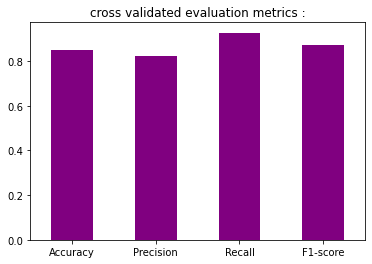

In [56]:
#plotting a bar graph of the above df
cv_metrics.T.plot(kind = "bar", color = ["purple"], legend = False)
plt.xticks(rotation = 0)
plt.title("cross validated evaluation metrics :");

### Feature importance 

>Feature importance is another way of asking "Which features contributed the most to achieve the outcomes of the model?"

* Finding feature importance is different for each machine learning model.

### Let's find the feature importance for our logistic model

In [57]:
#Fit an instance for the ligisticregression
gs_log_reg.best_params_

classifier = LogisticRegression(C= 0.23357214690901212, solver= 'liblinear')

#fit the classifier
classifier.fit(x_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [58]:
#check the _coef
classifier.coef_

array([[ 0.00369922, -0.90424093,  0.67472825, -0.0116134 , -0.00170364,
         0.04787688,  0.33490201,  0.02472938, -0.63120409, -0.57590965,
         0.47095149, -0.65165346, -0.69984211]])

In [59]:
#match the coef's of the features to the columns
feature_dict = dict(zip(df.columns, list(classifier.coef_[0])))

In [60]:
feature_dict #tells us how much each of them are contributing to predicting the target

{'age': 0.003699221627279003,
 'sex': -0.9042409285687546,
 'cp': 0.6747282509574564,
 'trestbps': -0.01161340025062118,
 'chol': -0.0017036437710376048,
 'fbs': 0.047876877336918186,
 'restecg': 0.33490200716536156,
 'thalach': 0.024729382362283066,
 'exang': -0.6312040866990564,
 'oldpeak': -0.5759096490530667,
 'slope': 0.47095148586396174,
 'ca': -0.6516534633333719,
 'thal': -0.6998421076294032}

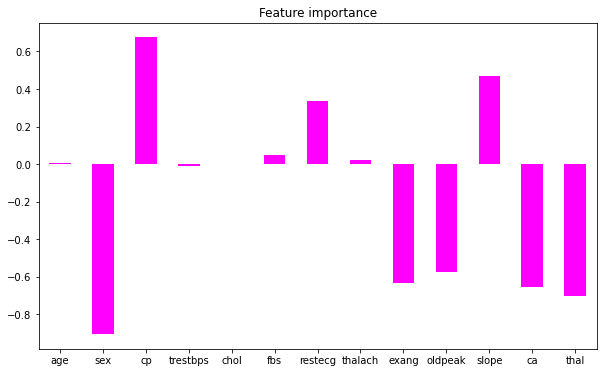

In [61]:
#visualizing the feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])

feature_df.T.plot(kind= "bar", figsize = (10,6), legend = False, cmap="spring")
plt.title("Feature importance")
plt.xticks(rotation= 0);

### Peak exercise ST segment : 1 = upsloping 2 = flat 3 = downsloping

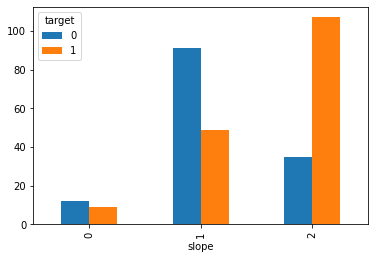

In [62]:
pd.crosstab(df["slope"], df["target"]).plot(kind = "bar"); #slope has positive coef